# Exploring congress member data
In this notebook we will explore the data about congress members which we cleaned in the data cleaning notebook. The overall goal is to get some understanding of what the data tells us and statistics about the data. To do this we'll look at data about the members of congress and, by using the districts data, in relation to the congress districts. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import os
pd.set_option('display.max_columns', 40)

In [2]:
#Load data file into fram 
current_folder = os.getcwd()
data = pd.read_csv(current_folder + '/data/resultingData/merged_data.csv')

In [3]:
data = data.drop(columns = ['Unnamed: 0']) #Drop unvanted columns
data

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Spouse,Childrens,...,"Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation,Most Employees,Largest Payroll,Most Establishments,Total Occupation,State
0,Alabama 1,Bradley Byrne,Republican,Yes,JD,2014,Fairhope,1955,Yes,4,...,0.036167,46445,65685,0.170,0.870,Retail trade,Manufacturing,Retail trade,302309,Alabama
1,Alabama 2,Martha Roby,Republican,Yes,JD,2011,Montgomery,1976,Yes,2,...,0.029845,48290,64712,0.180,0.857,Health care and social assistance,Health care and social assistance,Retail trade,277754,Alabama
2,Alabama 3,Mike Rogers,Republican,Yes,JD,2003,Saks,1958,Yes,0,...,0.032363,45832,64442,0.181,0.855,Manufacturing,Manufacturing,Retail trade,294766,Alabama
3,Alabama 4,Robert Aderholt,Republican,Yes,JD,1997,Haleyville,1965,Yes,0,...,0.029537,45387,63553,0.176,0.829,Manufacturing,Manufacturing,Retail trade,286219,Alabama
4,Alabama 5,Mo Brooks,Republican,Yes,JD,2011,Huntsville,1954,Yes,4,...,0.051529,57174,77865,0.129,0.888,"Professional, scientific, and technical services","Professional, scientific, and technical services",Retail trade,335078,Alabama
5,Alabama 6,Gary Palmer,Republican,No,Bachelor,2015,Hoover,1954,Yes,3,...,0.079435,66835,92608,0.103,0.910,Retail trade,Finance and insurance,Retail trade,333425,Alabama
6,Alabama 7,Terri Sewell,Democratic,No,JD,2011,Birmingham,1965,Yes,0,...,0.018241,37123,52653,0.247,0.845,Health care and social assistance,Health care and social assistance,Retail trade,264720,Alabama
7,Alaska at-large,Don Young,Republican,Yes,Bachelor,1973,Fort Yukon,1933,Yes,2,...,0.088002,74346,96080,0.109,0.933,Total for all sectors,Total for all sectors,Total for all sectors,345769,Alaska
8,Arizona 1,Tom O'Halleran,Democratic,Yes,Master,2017,Sedona,1946,Yes,0,...,0.035859,55444,70752,0.191,0.865,Accommodation and food services,Health care and social assistance,Retail trade,283024,Arizona
9,Arizona 2,Ann Kirkpatrick,Democratic,Yes,JD,2019,Tucson,1950,Yes,0,...,0.049097,53292,73595,0.132,0.908,Health care and social assistance,Health care and social assistance,Health care and social assistance,315603,Arizona


In [4]:
data['Median age(years)'] = data['Median age(years)'].astype({'Median age(years)':float})
data

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Spouse,Childrens,...,"Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation,Most Employees,Largest Payroll,Most Establishments,Total Occupation,State
0,Alabama 1,Bradley Byrne,Republican,Yes,JD,2014,Fairhope,1955,Yes,4,...,0.036167,46445,65685,0.170,0.870,Retail trade,Manufacturing,Retail trade,302309,Alabama
1,Alabama 2,Martha Roby,Republican,Yes,JD,2011,Montgomery,1976,Yes,2,...,0.029845,48290,64712,0.180,0.857,Health care and social assistance,Health care and social assistance,Retail trade,277754,Alabama
2,Alabama 3,Mike Rogers,Republican,Yes,JD,2003,Saks,1958,Yes,0,...,0.032363,45832,64442,0.181,0.855,Manufacturing,Manufacturing,Retail trade,294766,Alabama
3,Alabama 4,Robert Aderholt,Republican,Yes,JD,1997,Haleyville,1965,Yes,0,...,0.029537,45387,63553,0.176,0.829,Manufacturing,Manufacturing,Retail trade,286219,Alabama
4,Alabama 5,Mo Brooks,Republican,Yes,JD,2011,Huntsville,1954,Yes,4,...,0.051529,57174,77865,0.129,0.888,"Professional, scientific, and technical services","Professional, scientific, and technical services",Retail trade,335078,Alabama
5,Alabama 6,Gary Palmer,Republican,No,Bachelor,2015,Hoover,1954,Yes,3,...,0.079435,66835,92608,0.103,0.910,Retail trade,Finance and insurance,Retail trade,333425,Alabama
6,Alabama 7,Terri Sewell,Democratic,No,JD,2011,Birmingham,1965,Yes,0,...,0.018241,37123,52653,0.247,0.845,Health care and social assistance,Health care and social assistance,Retail trade,264720,Alabama
7,Alaska at-large,Don Young,Republican,Yes,Bachelor,1973,Fort Yukon,1933,Yes,2,...,0.088002,74346,96080,0.109,0.933,Total for all sectors,Total for all sectors,Total for all sectors,345769,Alaska
8,Arizona 1,Tom O'Halleran,Democratic,Yes,Master,2017,Sedona,1946,Yes,0,...,0.035859,55444,70752,0.191,0.865,Accommodation and food services,Health care and social assistance,Retail trade,283024,Arizona
9,Arizona 2,Ann Kirkpatrick,Democratic,Yes,JD,2019,Tucson,1950,Yes,0,...,0.049097,53292,73595,0.132,0.908,Health care and social assistance,Health care and social assistance,Health care and social assistance,315603,Arizona


Our final dataset has 47 columns and 431 rows. Since we'll focus on the members in this notebook the first 11 columns will be of most interest. However we'll use some of the data for the sitrict to do comparisons. We'll start with looking at some statistics regarding age when they assumed office and their current length in office. But first we'll look for outliers in the data using box plots, we'll look for outliers in each column as we use them.

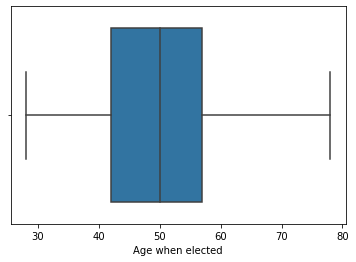

In [5]:
sb.boxplot(x = data['Age when elected']) #Boxplot of data dataFrame['...']

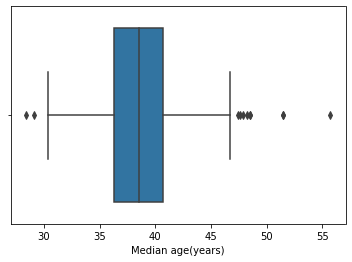

In [6]:
sb.boxplot(x = data['Median age(years)'])

As we can see the median age for congress districts data column has 9 outliers which we will look at below. Since boxplots uses, interquartile range IQR, which is the difference between the upper and lower quartiles, IQR = Q3-Q1

In [7]:
Q1 = data['Median age(years)'].quantile(0.25)
Q3 = data['Median age(years)'].quantile(0.75)
IQR = Q3-Q1
outliers = data.loc[(data['Median age(years)'] < Q1- 1.5 * IQR) | (data['Median age(years)'] > Q3 + 1.5 * IQR)] #calculate outliers above 3rd quantile or below 1st
outliers

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Spouse,Childrens,...,"Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation,Most Employees,Largest Payroll,Most Establishments,Total Occupation,State
11,Arizona 4,Paul Gosar,Republican,No,Profesional Doctorate,2011,Prescott,1958,Yes,3,...,0.025692,52481,65483,0.126,0.886,Retail trade,Health care and social assistance,Retail trade,296871,Arizona
14,Arizona 7,Ruben Gallego,Democratic,Yes,Bachelor,2015,Phoenix,1979,No,1,...,0.028302,46053,63126,0.223,0.714,Health care and social assistance,Health care and social assistance,Retail trade,388522,Arizona
91,Florida 6,Michael Waltz,Republican,No,Bachelor,2019,Daytona Beach,1974,No,0,...,0.043429,51745,71855,0.121,0.909,Health care and social assistance,Health care and social assistance,Retail trade,334566,Florida
93,Florida 8,Bill Posey,Republican,Yes,Master,2009,Rockledge,1947,Yes,2,...,0.047330,57866,78387,0.104,0.912,Health care and social assistance,Health care and social assistance,Retail trade,324921,Florida
96,Florida 11,Daniel Webster,Republican,Yes,Bachelor,2011,Winter Garden,1949,Yes,6,...,0.019898,47017,61474,0.126,0.887,Health care and social assistance,Health care and social assistance,Retail trade,258759,Florida
98,Florida 13,Charlie Crist,Democratic,Yes,JD,2017,St. Petersburg,1956,No,0,...,0.045983,52081,74815,0.123,0.912,Health care and social assistance,Health care and social assistance,"Professional, scientific, and technical services",358124,Florida
101,Florida 16,Vern Buchanan,Republican,No,Master,2007,Longboat Key,1951,Yes,2,...,0.071477,61838,88290,0.117,0.904,Retail trade,Health care and social assistance,Retail trade,374926,Florida
102,Florida 17,Greg Steube,Republican,Yes,JD,2019,Sarasota,1978,Yes,1,...,0.045896,51562,70427,0.144,0.882,Retail trade,Health care and social assistance,Retail trade,289895,Florida
103,Florida 18,Brian Mast,Republican,No,Master,2017,Hutchinson Island,1980,Yes,4,...,0.081856,60483,90393,0.098,0.899,Health care and social assistance,Health care and social assistance,"Professional, scientific, and technical services",344847,Florida
104,Florida 19,Francis Rooney,Republican,Yes,JD,2017,Naples,1953,Yes,3,...,0.082169,59366,93734,0.113,0.908,Retail trade,Health care and social assistance,Retail trade,350251,Florida


In the case of the two districts in Arizona one is clearly rural, Arizona 4, while the other is completely urban, firther they border each other and hence it's fair to assume that while they might be otliers from the data they are not so due to being incorrect. In the case of Utah's 3rd district it includes the city of Provo whose metro area has a population above 500,000 and althoug not all might live in the 3rd district considering that the total population is aroun 770,000 the lower median might be correct. For Florida all outliers are coastal districts and except for the 13th district the largest age group is 65-74 which is a strong indicator that a lot of people have retired to these districts, or alternativel an aging population. Since thesse outleiers can be explained we will not remove them for the rest of the analysis. 

We will then start with some statistics about how old congress members have been when they got elected.

In [8]:
mean_AWE = data['Age when elected'].mean(axis = 0)
median_AWE = data['Age when elected'].median(axis = 0)
print('Youngest, in years, when elected: ', data['Age when elected'].min(axis = 0))
print('Oldest, in years, when elected: ', data['Age when elected'].max(axis = 0))
print('Mean age, in years, when elected: ', mean_AWE)
print('Median age, in years, when elected: ', median_AWE)
median_age_US_disctricts = data['Median age(years)'].median(axis = 0)
print('Median age, in years, in US congress districts: ', median_age_US_disctricts)

Youngest, in years, when elected:  28
Oldest, in years, when elected:  78
Mean age, in years, when elected:  49.577726218097446
Median age, in years, when elected:  50.0
Median age, in years, in US congress districts:  38.5


As we can see the congress members are a fair bit older on both average and median compared to age in the US. If we instead look at how many where younger than the current median age in their respective congress district when they were elected we can show it as a histogram and fit a curve to it in seaborn.

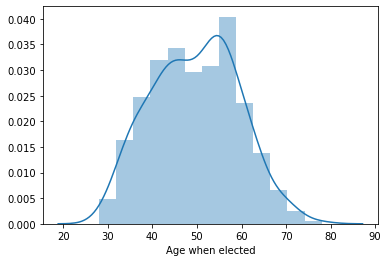

In [9]:
sb.distplot(data['Age when elected']) #Make histogram and fit line to it

As we can see the distribution appears to have a gaussian nature, though it also displays some bimodal behaviour. Doing the same thing for the median age of the us congressional districts give us

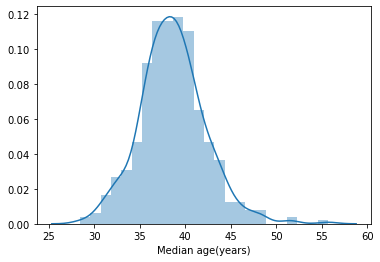

In [10]:
sb.distplot(data['Median age(years)'])

As we can see the distribution of the median age clearly follows a gaussian distribution, with the exception of the outliers discussed above.

One last thing which we can look at using the 'Age when elected' column is how often the congress member was above the median age, by comparing the two distributions we expect the number that were older to be larger than those below.  

Number of congress members being older than current median age when elected:  359
Number of congress members being younger than current median age when elected:  71


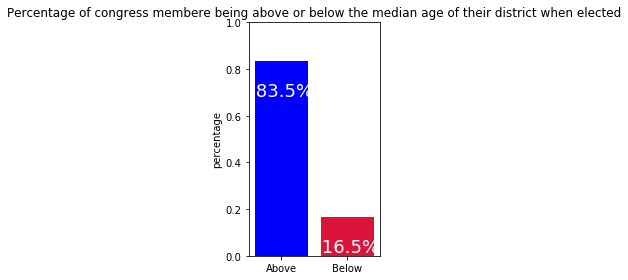

In [11]:
above = data.loc[:,'Age when elected'].gt(data.loc[:,'Median age(years)'],axis = 0).sum(axis = 0) #compare values in column A with values in column B
below = data.loc[:,'Age when elected'].lt(data.loc[:,'Median age(years)'],axis = 0).sum(axis = 0)
print('Number of congress members being older than current median age when elected: ', above)
print('Number of congress members being younger than current median age when elected: ', below)

plt.bar(x = ['Above', 'Below'], #Set name of bars
        height = [above / (above + below), below / (above + below)], #calculate value for each class
        color = ['blue', 'crimson']) #Give each class a color
ax = plt.gca() #set axis
ax.set(title = 'Percentage of congress membere being above or below the median age of their district when elected', ylabel = 'percentage') #give names to axis
plt.ylim(0, 1)
for p in ax.patches: #print the height in middle of each bar
    ax.annotate(f'\n{p.get_height() * 100: .1f}%', 
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

This then confirms that the majority of congress members where older than the median age of their congress district when they were elected, assuming that the median age has been fairly constant, one interesting thing is that one member had the same age when elected as the median age of the congress district.

Next we'll have a look at the years in office. We start with a box plot, to see if their is any outliers and then we get the min/max mean and median values and finaly we plot the distribution.

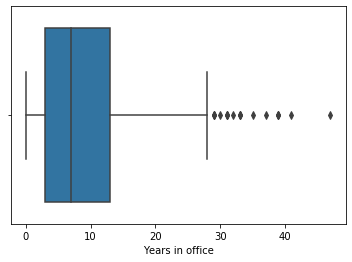

In [12]:
sb.boxplot(x = data['Years in office'])

As we can see there is a fairly wide spread of the number of years in office, from newly elected to apparently over 40 years. Just to check we'll look at the outliers again and hopefully we can again conclude that while they are outliers they aren't incorrect data

In [13]:
Q1 = data['Years in office'].quantile(0.25)
Q3 = data['Years in office'].quantile(0.75)
IQR = Q3-Q1
outliers = data.loc[(data['Years in office'] > Q3 + 1.5 * IQR)]
outliers

,District,Member,Party,Prior experience,Education,Assumed office,Residence,Born,Spouse,Childrens,...,"Fraction of households with income at $200,000 or more",Median household income,Mean household income,Fraction of all people below poverty level,Fraction attaining at least high school graduation,Most Employees,Largest Payroll,Most Establishments,Total Occupation,State
7,Alaska at-large,Don Young,Republican,Yes,Bachelor,1973,Fort Yukon,1933,Yes,2,...,0.088002,74346,96080,0.109,0.933,Total for all sectors,Total for all sectors,Total for all sectors,345769,Alaska
32,California 12,Nancy Pelosi,Democratic,No,Bachelor,1987,San Francisco,1940,Yes,5,...,0.289371,113919,168456,0.101,0.902,"Professional, scientific, and technical services","Professional, scientific, and technical services","Professional, scientific, and technical services",467520,California
63,California 43,Maxine Waters,Democratic,Yes,Bachelor,1991,Inglewood,1938,No,2,...,0.068708,64721,86927,0.143,0.782,Transportation and warehousing,Transportation and warehousing,Health care and social assistance,376831,California
82,Connecticut 3,Rosa DeLauro,Democratic,No,Master,1991,New Haven,1943,Yes,3,...,0.092438,70498,95711,0.115,0.914,Health care and social assistance,Health care and social assistance,Retail trade,370125,Connecticut
148,Indiana 1,Pete Visclosky,Democratic,No,JD,1985,Merrillville,1949,Yes,0,...,0.037336,56794,73653,0.138,0.899,Health care and social assistance,Manufacturing,Retail trade,330448,Indiana
169,Kentucky 5,Hal Rogers,Republican,No,Bachelor,1981,Mount Vernon,1937,Yes,3,...,0.015243,35409,49534,0.265,0.779,Health care and social assistance,Health care and social assistance,Retail trade,233370,Kentucky
183,Maryland 5,Steny Hoyer,Democratic,Yes,JD,1981,Mechanicsville,1939,Yes,3,...,0.135187,99738,115818,0.064,0.922,"Professional, scientific, and technical services","Professional, scientific, and technical services","Professional, scientific, and technical services",392371,Maryland
187,Massachusetts 1,Richard Neal,Democratic,Yes,Master,1989,Springfield,1949,Yes,4,...,0.052739,57381,77310,0.143,0.879,Health care and social assistance,Health care and social assistance,Retail trade,350075,Massachusetts
201,Michigan 6,Fred Upton,Republican,No,Bachelor,1987,St. Joseph,1953,Yes,2,...,0.040420,55442,73874,0.139,0.907,Total for all sectors,Total for all sectors,Total for all sectors,350053,Michigan
216,Minnesota 7,Collin Peterson,Democratic,Yes,Bachelor,1991,Detroit Lakes,1944,No,0,...,0.029430,58463,73338,0.107,0.923,Health care and social assistance,Manufacturing,Retail trade,329801,Minnesota


As we can see most of these outliers just happens to be older persons who assumed office in their 30s-40s, which as we saw earlier might be part of the lower end of the curve but still reasonable, hence we won't excluded them either. Next we'll get the statistics for which year congress members where elected, which corresponds to years in office since years in office is 'CurrentYear'-'Assumed office'. 

Earliest elected:  1973
Latest elected:  2020
Mean year, when elected:  2010.6519721577727
Median year when elected:  2013.0


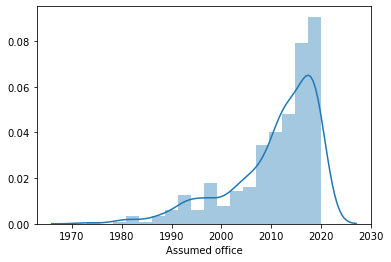

In [14]:
data['Assumed office'] = data['Assumed office'].astype({'Assumed office':int})
mean_Ao = data['Assumed office'].mean(axis = 0)
median_Ao = data['Assumed office'].median(axis = 0)
print('Earliest elected: ', data['Assumed office'].min(axis = 0))
print('Latest elected: ', data['Assumed office'].max(axis = 0))
print('Mean year, when elected: ', mean_Ao)
print('Median year when elected: ', median_Ao)
sb.distplot(data['Assumed office'])

This distribution is following that of a log-normal distribution, we can also see that the mean year and median year is fairly different which is du to the outleiers increasing the mean value by quite alot.

One final thing which we can do with this column is to see how many was  elected after the last presidential election, 2016.

Number of congress members elected after 2016:  151
Number of congress members elected before 2016:  280


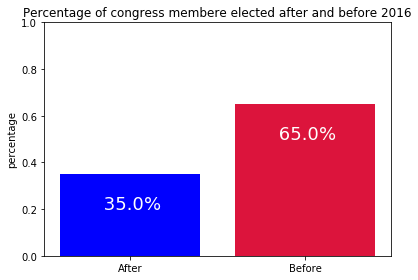

In [15]:
after = data.loc[:,'Assumed office'].gt(2016,axis = 0).sum(axis = 0)
before = 431 - after
print('Number of congress members elected after 2016: ', after)
print('Number of congress members elected before 2016: ', before)

plt.bar(x = ['After', 'Before'],
        height = [after / (after + before), before / (after + before)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of congress membere elected after and before 2016', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

So as we can see a majority was elected before 2016 which should come as no surprise seing as the average and median values where bothe lower than 2016. 

Now we'll look at the number of childrens. For this we'll do the same a nalysis as before.

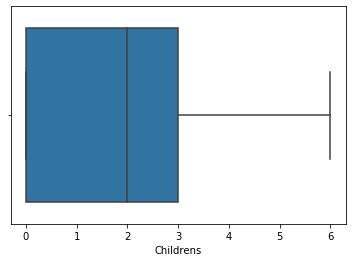

In [17]:
sb.boxplot(x = data['Childrens'])

Mean number of childrens:  1.8352668213457077
Median number of childrens:  2.0


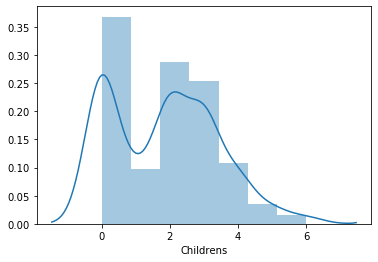

In [18]:
mean_Ch = data['Childrens'].mean(axis = 0)
median_Ch = data['Childrens'].median(axis = 0)
print('Mean number of childrens: ', mean_Ch)
print('Median number of childrens: ', median_Ch)
sb.distplot(data['Childrens'], bins = 7)

So what we can see is that the median number of childrens are 2 while the mean is a bit lower at 1.8 childrens. Furthermore the distribution clearly shows that the statistics is skewed towards less childrens with the distribution following a bimodal one with peaks at 0 and 2-3 childrens.

Continuing with the family theme we'll look at the percentage of married and un maried congress members and then the distribution of childrens for these two groups

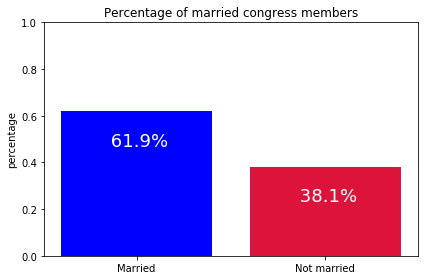

In [20]:
married_frame = data.loc[data['Spouse'] == 'Yes']
not_married_frame = data.loc[data['Spouse'] == 'No']
married_yes = len(married_frame)
married_no = len(not_married_frame)

plt.bar(x=['Married', 'Not married'],
        height = [married_yes / (married_yes + married_no), married_no / (married_yes + married_no)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of married congress members', ylabel = 'percentage')

plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

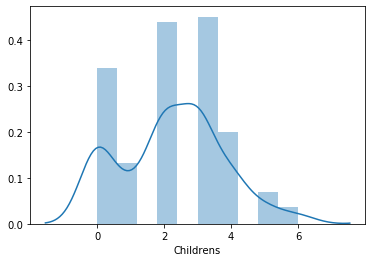

In [21]:
sb.distplot(married_frame['Childrens'])

In [ ]:
sb.distplot(not_married_frame['Childrens'])

So what we can see from this is that the distribution of number of childrens for both amrried and not married congress members are bimodal with peaks at the same place however for non married congress members around 80% had no childrens while around 27% had 2 childrens. In comparison for married congress members about 35% had 0 childrens and about 45% had 2 childrens.

Now we'll look at the degree which the elected members have.

In [ ]:
nr_Phd = len(data.loc[data['Education'] == 'PhD'])
nr_JD = len(data.loc[data['Education'] == 'JD'])
nr_Master = len(data.loc[data['Education'] == 'Master'])
nr_Bachelor = len(data.loc[data['Education'] == 'Bachelor'])
nr_Proff = len(data.loc[data['Education'] == 'Profesional Doctorate'])
tot = nr_Phd + nr_JD + nr_Master + nr_Bachelor + nr_Proff

plt.bar(x = ['PhD', 'Profesional Doctorate', 'Master', 'Bachelor', 'JD'],
        height = [nr_Phd / tot, nr_Proff / tot, nr_Master / tot, nr_Bachelor / tot, nr_JD / tot ])
ax = plt.gca()
ax.set(title = 'Education attained', ylabel = 'percentage')
plt.ylim(0, 0.4)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)

The most common education achievde is a JD which is a professional degree in law while PhD is the least common, though it should be noted that the subject for the PhD is not known.

Finally we'll look at the prior experience, if they have prior public experience or not.

In [ ]:
experienced = len(data.loc[data['Prior experience'] == 'Yes'])
not_experienced = len(data.loc[data['Prior experience'] == 'No'])

plt.bar(x = ['Yes', 'No'],
        height = [experienced / (experienced + not_experienced), no_experienced / (experienced + not_experienced)])
ax = plt.gca()
ax.set(title = 'Prior public experience', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)


So as we can see the proportion of people with prior public experienced is about the same as those which are married.

So far we have looked at the data for the congress as a whole now we'll instead look at the spcifics for both parties. First we'll look at the democrats and then we'll turn our attention to the republicans. However first thing to look at is the proportions of democrats and republicans. 

In [ ]:
democrats = data.loc[data['Party'] == 'Democratic'] #get dataframe of democrats
republicans = data.loc[data['Party'] == 'Republican'] #get data frame of republicans

plt.bar(x = ['Democrats', 'Republicans'],
        height = [len(democrats) / (len(democrats) + len(republicans)), len(republicans) / (len(democrats) + len(republicans))])
ax = plt.gca()
ax.set(title = 'Percentage of democrats and republicans', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)


From this we can tell that the dataset is fairly balanced for the two parties but that there are some more democrats compared to republicans. Now onto the visualisation of data for democrats.

In [ ]:
mean_AWE = democrats['Age when elected'].mean(axis = 0)
median_AWE = democrats['Age when elected'].median(axis = 0)
print('Youngest, in years, when elected: ', democrats['Age when elected'].min(axis = 0))
print('Oldest, in years, when elected: ', democrats['Age when elected'].max(axis = 0))
print('Mean age, in years, when elected: ', mean_AWE)
print('Median age, in years, when elected: ', median_AWE)
sb.distplot(democrats['Age when elected'])

In [ ]:
above = democrats.loc[:,'Age when elected'].gt(democrats.loc[:,'Median age(years)'],axis = 0).sum(axis = 0)
below = democrats.loc[:,'Age when elected'].lt(democrats.loc[:,'Median age(years)'],axis = 0).sum(axis = 0)
print('Number of congress members being older than current median age when elected: ', above)
print('Number of congress members being younger than current median age when elected: ', below)

plt.bar(x = ['Above', 'Below'],
        height = [above / (above + below), below / (above + below)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of democrat congress membere being above or below the median age of their district when elected', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

Next we'll look at the data regarding when they were elected.

In [ ]:
democrats['Assumed office'] = democrats['Assumed office']
mean_Ao = democrats['Assumed office'].mean(axis = 0)
median_Ao = democrats['Assumed office'].median(axis = 0)
print('Earliest elected: ', democrats['Assumed office'].min(axis = 0))
print('Latest elected: ', democrats['Assumed office'].max(axis = 0))
print('Mean year, when elected: ', mean_Ao)
print('Median year when elected: ', median_Ao)
sb.distplot(democrats['Assumed office'])

In [ ]:
after = democrats.loc[:,'Assumed office'].gt(2016,axis = 0).sum(axis = 0)
before = 431 - after
print('Number of congress members elected after 2016: ', after)
print('Number of congress members elected before 2016: ', before)

plt.bar(x = ['After', 'Before'],
        height = [after / (after + before), before / (after + before)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of democrat congress membere elected after and before 2016', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

Now it's time for marital and number of childrens.

In [ ]:
sb.boxplot(x = democrats['Childrens'])

In [ ]:
mean_Ch = democrats['Childrens'].mean(axis = 0)
median_Ch = democrats['Childrens'].median(axis = 0)
print('Mean number of childrens: ', mean_Ch)
print('Median number of childrens: ', median_Ch)
sb.distplot(democrats['Childrens'])

In [ ]:
married_yes_d = len(democrats.loc[democrats['Spouse'] == 'Yes'])
married_no_d = len(democrats) - married_yes_d

plt.bar(x = ['Married', 'Not married'],
        height = [married_yes_d / (married_yes_d + married_no_d), married_no_d / (married_yes_d + married_no_d)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of married democrat congress members', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

In [ ]:
married_frame = democrats.loc[democrats['Spouse'] == 'Yes']
not_married_frame = democrats.loc[democrats['Spouse'] == 'No']
sb.distplot(married_frame['Childrens'])

In [ ]:
sb.distplot(not_married_frame['Childrens'])

Next is education.

In [ ]:
nr_Phd = len(democrats.loc[democrats['Education'] == 'PhD'])
nr_JD = len(democrats.loc[democrats['Education'] == 'JD'])
nr_Master = len(democrats.loc[democrats['Education'] == 'Master'])
nr_Bachelor = len(democrats.loc[democrats['Education'] == 'Bachelor'])
nr_Proff = len(democrats.loc[democrats['Education'] == 'Profesional Doctorate'])
tot = nr_Phd + nr_JD + nr_Master + nr_Bachelor + nr_Proff

plt.bar(x = ['PhD', 'Profesional Doctorate', 'Master', 'Bachelor', 'JD'],
        height = [nr_Phd / tot, nr_Proff / tot, nr_Master / tot, nr_Bachelor / tot, nr_JD / tot ])
ax = plt.gca()
ax.set(title = 'Education attained', ylabel = 'percentage')
plt.ylim(0, 0.5)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)

Finally when have prior public experience

In [ ]:
experienced = len(democrats.loc[data['Prior experience'] == 'Yes'])
not_experienced = len(democrats.loc[data['Prior experience'] == 'No'])

plt.bar(x = ['Yes', 'No'],
        height = [experienced / (experienced + not_experienced), not_experienced / (experienced + not_experienced)])
ax = plt.gca()
ax.set(title = 'Prior public experience', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()*100:.1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)


Now we'll perform the same visualization for the republicans.

In [ ]:
mean_AWE = republicans['Age when elected'].mean(axis = 0)
median_AWE = republicans['Age when elected'].median(axis = 0)
print('Youngest, in years, when elected: ', republicans['Age when elected'].min(axis = 0))
print('Oldest, in years, when elected: ', republicans['Age when elected'].max(axis = 0))
print('Mean age, in years, when elected: ', mean_AWE)
print('Median age, in years, when elected: ', median_AWE)
sb.distplot(republicans['Age when elected'])

In [ ]:
above = republicans.loc[:,'Age when elected'].gt(republicans.loc[:,'Median age(years)'],axis = 0).sum(axis = 0)
below = republicans.loc[:,'Age when elected'].lt(republicans.loc[:,'Median age(years)'],axis = 0).sum(axis = 0)
print('Number of congress members being older than current median age when elected: ', above)
print('Number of congress members being younger than current median age when elected: ', below)

plt.bar(x=['Above', 'Below', ],
        height = [above / (above + below), below / (above + below)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of republican congress membere being above or below the median age of their district when elected', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)


In [ ]:
republicans['Assumed office'] = republicans['Assumed office']
mean_Ao = republicans['Assumed office'].mean(axis = 0)
median_Ao = republicans['Assumed office'].median(axis = 0)
print('Earliest elected: ', republicans['Assumed office'].min(axis = 0))
print('Latest elected: ', republicans['Assumed office'].max(axis = 0))
print('Mean year, when elected: ', mean_Ao)
print('Median year when elected: ', median_Ao)
sb.distplot(republicans['Assumed office'])

In [ ]:
## get date
after = republicans.loc[:,'Assumed office'].gt(2016,axis = 0).sum(axis = 0)
before = 431 - after
print('Number of congress members elected after 2016: ', after)
print('Number of congress members elected before 2016: ', before)

## make plot
plt.bar(x = ['After', 'Before'],
        height = [after / (after + before), before / (after + before)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of republican congress membere elected after and before 2016', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

Marital status and children

In [ ]:
sb.boxplot(x = republicans['Childrens']) 

In [ ]:
mean_Ch = republicans['Childrens'].mean(axis=0)
median_Ch = republicans['Childrens'].median(axis=0)
print('Mean number of childrens: ', mean_Ch)
print('Median number of childrens: ', median_Ch)
sb.distplot(republicans['Childrens']) #plot distribution

In [ ]:
#get data
married_frame = republicans.loc[republicans['Spouse'] == 'Yes']
not_married_frame = republicans.loc[republicans['Spouse'] == 'No']
married_yes = len(married_frame)
married_no = len(not_married_frame)

# Make plot
plt.bar(x = ['Married', 'Not married'],
        height = [married_yes / (married_yes + married_no), married_no / (married_yes + married_no)],
        color = ['blue', 'crimson'])
ax = plt.gca()
ax.set(title = 'Percentage of married republican congress members', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)
plt.tight_layout()

In [ ]:
sb.distplot(married_frame['Childrens']) #Plot distribution of childrens for married

In [ ]:
sb.distplot(not_married_frame['Childrens']) #Plot distribution of childrens for unmaried

And now education.

In [ ]:
## get data
nr_Phd = len(republicans.loc[republicans['Education'] == 'PhD'])
nr_JD = len(republicans.loc[republicans['Education'] == 'JD'])
nr_Master = len(republicans.loc[republicans['Education'] == 'Master'])
nr_Bachelor = len(republicans.loc[republicans['Education'] == 'Bachelor'])
nr_Proff = len(republicans.loc[republicans['Education'] == 'Profesional Doctorate'])
tot = nr_Phd + nr_JD + nr_Master + nr_Bachelor + nr_Proff

## make bar plot
plt.bar(x=['PhD', 'Profesional Doctorate', 'Master', 'Bachelor', 'JD'],
        height = [nr_Phd / tot, nr_Proff / tot, nr_Master / tot, nr_Bachelor / tot, nr_JD / tot ])
ax = plt.gca()
ax.set(title = 'Education attained', ylabel = 'percentage')
plt.ylim(0, 0.5)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)

Ending with prior public experience

In [ ]:
## Get data
experienced = len(republicans.loc[data['Prior experience'] == 'Yes'])
not_experienced = len(republicans.loc[data['Prior experience'] == 'No'])

## Make bar plot
plt.bar(x=['Yes', 'No'],
        height = [experienced / (experienced + not_experienced), not_experienced / (experienced + not_experienced)])
ax = plt.gca()
ax.set(title='Prior public experience', ylabel = 'percentage')
plt.ylim(0, 1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height() * 100: .1f}%',
      (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 18)


Now we have the data visualized. From this we can conclude that there are mostly minor differences between the two groups. Democrats have about 5% more members with prior experience having more members with higher education while on the other hand republicans have more people with a bachelors degree or Professional degree. When looking at the number of childrens both groups hae a median value of two but republicans average is above 2 while democrats are below. For marital status republicans have more members that are currently married compared to democrats. Looking at when members were elected a higher percentage of democrats was elected after 2016 compared to republicans, about 3% difference. At the same time the mean year when the members where elected is 2009 for democrats and 2011 for republicans. While republican congress members are a bit older on average they have the member who was youngest when being elected and having a higher percentage of members who were elected when they were below their districts median age while the democrats have a bit lower mean ad median age while still having teh member who were oldest when elected.

After having looked at this data there doesn't appear to be any clear features dividing the members of the two parties. In the next notebook we'll look at data from congressional districts which might give us more insight to who gets elected.